In [90]:
## import value pct is the percentage of values spent on this product / total import values (95.7B)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
%matplotlib inline

In [91]:
## 4 digit depth
df_4digit = pd.read_csv("year_origin_hs07_4.tsv",sep="\t")
df_4digit = df_4digit[df_4digit['origin'] == "sau"]
list = [701,702,703,704,705,706,707,708,709,7010,7011,7011,7012,7013,7014]
df_4digit = df_4digit[df_4digit.hs07.isin(list)]

#print(df_4digit.info())
#print(df_4digit.head())

In [92]:
## 6 digit depth
df_6digit = pd.read_csv("year_origin_hs07_6.tsv",sep="\t")
df_6digit = df_6digit[df_6digit['origin'] == "sau"]
list_of_no = [70110,70190,70200,70310,70320,70410,70420,70511,70519,70610,70700,70810,70820,70930]
list_of_veg = ["Potatoes","Potatoes","Tomatoes","Onions","Garlic","Cauliflowers and Broccoli","Brussel Sprouts","Lettuce and Cabbage","Lettuce and Cabbage","Carrots","Cucumbers","Peas","Beans","Aubergines"]
df_6digit = df_6digit[df_6digit.hs07.isin(list_of_no)]
df_6digit["Vegetable"] = ""
df_6digit.drop(["export_val","export_rca","import_rca"], axis=1,inplace =True)
print(df_6digit.head())

        year origin   hs07   import_val Vegetable
312997  2008    sau  70110  25167887.48          
312998  2008    sau  70190   4589106.99          
312999  2008    sau  70200  55643849.04          
313000  2008    sau  70310  63822243.90          
313001  2008    sau  70320  12253179.00          


In [93]:
for index ,rows in df_6digit.iterrows():
    for i in range(len(list_of_no)):
        if df_6digit["hs07"].loc[index] == list_of_no[i]:
            df_6digit["Vegetable"].loc[index] = list_of_veg[i]
print(df_6digit)

         year origin   hs07    import_val                  Vegetable
312997   2008    sau  70110  2.516789e+07                   Potatoes
312998   2008    sau  70190  4.589107e+06                   Potatoes
312999   2008    sau  70200  5.564385e+07                   Tomatoes
313000   2008    sau  70310  6.382224e+07                     Onions
313001   2008    sau  70320  1.225318e+07                     Garlic
313003   2008    sau  70410  3.789560e+05  Cauliflowers and Broccoli
313004   2008    sau  70420  1.997800e+04            Brussel Sprouts
313006   2008    sau  70511  2.842512e+06        Lettuce and Cabbage
313007   2008    sau  70519  2.268047e+06        Lettuce and Cabbage
313010   2008    sau  70610  6.431840e+06                    Carrots
313012   2008    sau  70700  3.563100e+04                  Cucumbers
313013   2008    sau  70810  6.718330e+05                       Peas
313014   2008    sau  70820  1.850140e+06                      Beans
313017   2008    sau  70930  4.844

In [94]:
print(df_6digit["Vegetable"].unique())

['Potatoes' 'Tomatoes' 'Onions' 'Garlic' 'Cauliflowers and Broccoli'
 'Brussel Sprouts' 'Lettuce and Cabbage' 'Carrots' 'Cucumbers' 'Peas'
 'Beans' 'Aubergines']


In [95]:
#df_6digit = df_6digit[df_6digit['year'] == 2008]
#df_6digit.groupby(["Vegetable"])
df_6digit = df_6digit.groupby(["Vegetable","year"]).sum()
print(df_6digit)
df_6digit['import_val'] = df_6digit['import_val'].apply(lambda x: x*3.75)
#print(df_6digit.head())

                        hs07    import_val
Vegetable       year                      
Aubergines      2008   70930  4.844710e+05
                2009   70930  6.791000e+04
                2010   70930  3.029020e+05
                2011   70930  7.958600e+04
                2012   70930  1.780080e+05
                2013   70930  7.317800e+05
                2014   70930  7.980950e+05
                2015   70930  5.235089e+05
                2016   70930  1.012012e+06
                2017   70930  6.784320e+05
Beans           2008   70820  1.850140e+06
                2009   70820  2.833766e+06
                2010   70820  2.401717e+06
                2011   70820  1.589324e+06
                2012   70820  2.210642e+06
                2013   70820  1.600701e+06
                2014   70820  1.233324e+06
                2015   70820  2.324422e+06
                2016   70820  8.004450e+05
                2017   70820  9.289800e+05
Brussel Sprouts 2008   70420  1.997800e+04
           

In [103]:
df_6digit = df_6digit.reset_index()
df_6digit.to_csv("6_digit_data.csv")

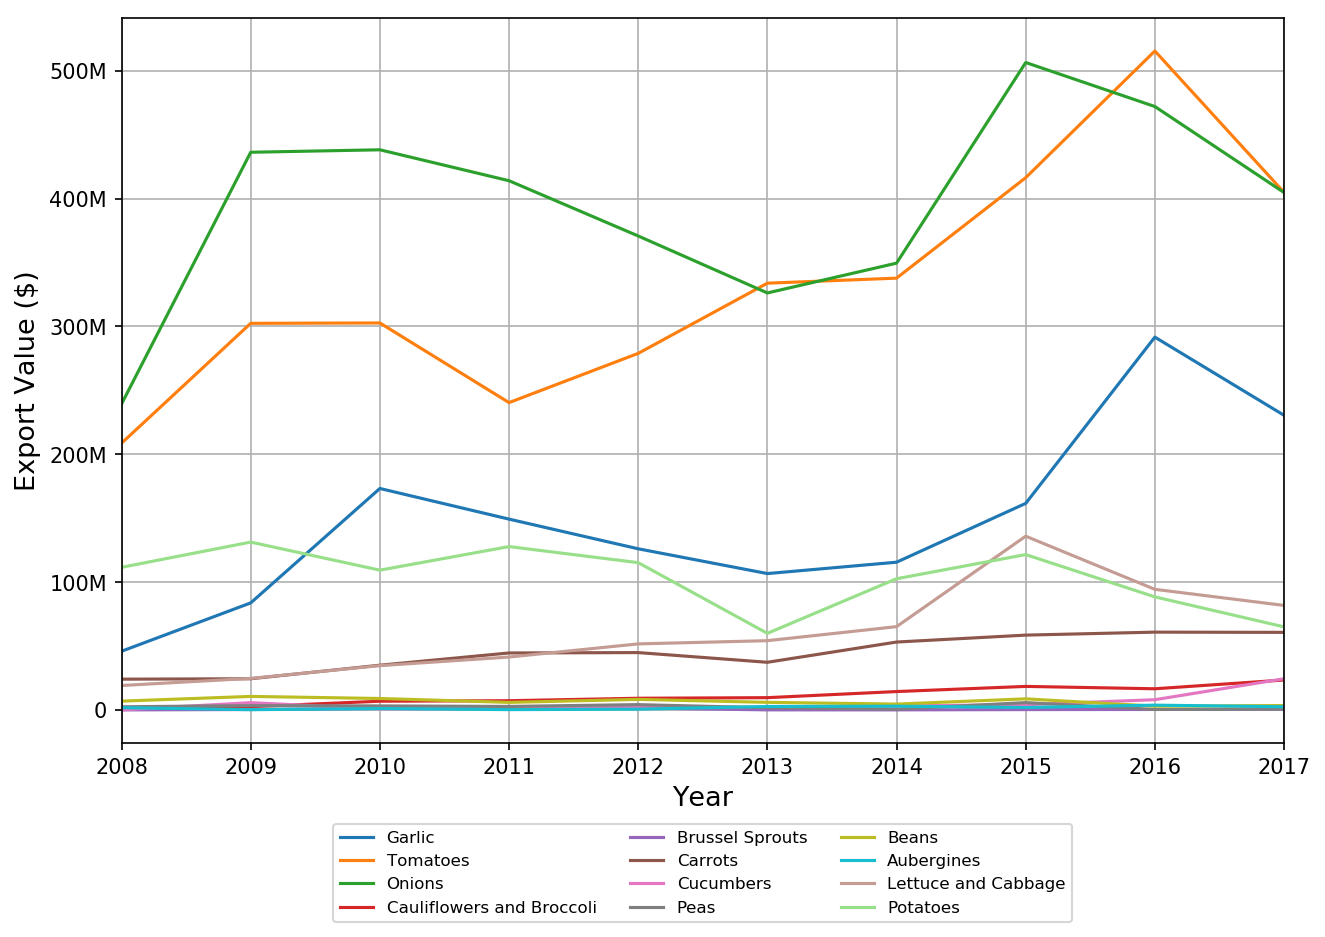

In [102]:
fig = plt.figure(figsize=(10,8), dpi=150)
fig.patch.set_facecolor('w')
ax = plt.subplot(111)


df_6digit_g = df_6digit[df_6digit['Vegetable'] == "Garlic"]
plt.plot(df_6digit_g["year"],df_6digit_g["import_val"], label = "Garlic")

df_6digit_t = df_6digit[df_6digit['Vegetable'] == "Tomatoes"]
ax.plot(df_6digit_t["year"],df_6digit_t["import_val"], label = "Tomatoes")

df_6digit_o = df_6digit[df_6digit['Vegetable'] == "Onions"]
ax.plot(df_6digit_o["year"],df_6digit_o["import_val"],label = "Onions")

df_6digit_cb = df_6digit[df_6digit['Vegetable'] == "Cauliflowers and Broccoli"]
ax.plot(df_6digit_cb["year"],df_6digit_cb["import_val"], label = "Cauliflowers and Broccoli")

df_6digit_bs = df_6digit[df_6digit['Vegetable'] == "Brussel Sprouts"]
ax.plot(df_6digit_bs["year"],df_6digit_bs["import_val"], label = "Brussel Sprouts")

df_6digit_c = df_6digit[df_6digit['Vegetable'] == "Carrots"]
ax.plot(df_6digit_c["year"],df_6digit_c["import_val"], label = "Carrots")

df_6digit_cu = df_6digit[df_6digit['Vegetable'] == "Cucumbers"]
ax.plot(df_6digit_cu["year"],df_6digit_cu["import_val"], label = "Cucumbers")

df_6digit_p = df_6digit[df_6digit['Vegetable'] == "Peas"]
ax.plot(df_6digit_p["year"],df_6digit_p["import_val"], label = "Peas")

df_6digit_b = df_6digit[df_6digit['Vegetable'] == "Beans"]
ax.plot(df_6digit_b["year"],df_6digit_b["import_val"], label = "Beans")

df_6digit_a = df_6digit[df_6digit['Vegetable'] == "Aubergines"]
ax.plot(df_6digit_a["year"],df_6digit_a["import_val"], label = "Aubergines")

df_6digit_lc = df_6digit[df_6digit['Vegetable'] == "Lettuce and Cabbage"]
ax.plot(df_6digit_lc["year"],df_6digit_lc["import_val"], label = "Lettuce and Cabbage", c=(0.7686274509803922, 0.611764705882353, 0.5803921568627451))

df_6digit_po = df_6digit[df_6digit['Vegetable'] == "Potatoes"]
ax.plot(df_6digit_po["year"],df_6digit_po["import_val"], label = "Potatoes", c=(0.596078431372549, 0.8745098039215686, 0.5411764705882353))



# Shrink current axis's height by 25% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.25,
               box.width, box.height * 0.8])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
        fancybox=True, shadow=False, ncol=3, fontsize=8)

ax.grid(zorder=0)
ax.set_xlim(2008,2017)
ax.set_ylabel('Import value in SR', fontsize=13)
ax.set_xlabel('Year', fontsize=13)

tick = ticker.EngFormatter(sep = '')
tick.ENG_PREFIXES[0]=''
tick.ENG_PREFIXES[3]='K'
tick.ENG_PREFIXES[6]='M'
tick.ENG_PREFIXES[9]='B'
tick.ENG_PREFIXES[12]='T'

ax.yaxis.set_major_formatter(tick)

plt.title('Imports of Vegtbales', fontsize=14)
plt.show()

In [100]:
mpl.cm.tab20.colors[:15]

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745))